# Task 1 - Distribution of genes among the different clusters - 6_firework
This notebook analyses the distribution of individual genes among the different clusters.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
from os import listdir
from os.path import isfile, join
import logging

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

### Load adata

In [3]:
adata = sc.read_h5ad('../data/adata/rev_processed_adata6.h5ad')
adata.obs

sample_id sample_nr  donor  n_genes_by_counts  \
AAACCCAAGCTCTGTA-1-1-0  6_firework         0  mouse               6168   
AAACCCAAGGGTACAC-1-1-0  6_firework         0  mouse               5835   
AAACCCACAAGCGCAA-1-1-0  6_firework         0  mouse               7475   
AAACCCACAATCTGCA-1-1-0  6_firework         0  mouse               8379   
AAACCCACAGTAACAA-1-1-0  6_firework         0  mouse               6447   
...                            ...       ...    ...                ...   
TTTGTTGGTAGATTAG-1-1-0  6_firework         0  mouse               8272   
TTTGTTGGTTGCATGT-1-1-0  6_firework         0  mouse               7248   
TTTGTTGTCCAACTGA-1-1-0  6_firework         0  mouse               6522   
TTTGTTGTCCGGCAAC-1-1-0  6_firework         0  mouse               8506   
TTTGTTGTCTCTATAC-1-1-0  6_firework         0  mouse               8079   

                        log1p_n_genes_by_counts  total_counts  \
AAACCCAAGCTCTGTA-1-1-0                 8.727292       26633.0   
AAACCCAAGGGTACAC-1-1-0                 8.671801       29206.0   
AAACCCACAAGCGCAA-1-1-0                 8.919453       45081.0   
AAACCCACAATCTGCA-1-1-0                 9.033603       79000.0   
AAACCCACAGTAACAA-1-1-0                 8.771525       27153.0   
...                                         ...           ...   
TTTGTTGGTAGATTAG-1-1-0                 9.020752       75314.0   
TTTGTTGGTTGCATGT-1-1-0                 8.888619       57882.0   
TTTGTTGTCCAACTGA-1-1-0                 8.783090       38021.0   
TTTGTTGTCCGGCAAC-1-1-0                 9.048645       97826.0   
TTTGTTGTCTCTATAC-1-1-0                 8.997147       62519.0   

                        log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCCAAGCTCTGTA-1-1-0           10.189944                   13.288026   
AAACCCAAGGGTACAC-1-1-0           10.282164                   19.427515   
AAACCCACAAGCGCAA-1-1-0           10.716238                   15.600807   
AAACCCACAATCTGCA-1-1-0           11.277216                   20.308861   
AAACCCACAGTAACAA-1-1-0           10.209280                   14.639266   
...                                    ...                         ...   
TTTGTTGGTAGATTAG-1-1-0           11.229435                   20.295031   
TTTGTTGGTTGCATGT-1-1-0           10.966179                   20.218721   
TTTGTTGTCCAACTGA-1-1-0           10.545920                   20.246706   
TTTGTTGTCCGGCAAC-1-1-0           11.490956                   19.474373   
TTTGTTGTCTCTATAC-1-1-0           11.043242                   18.040916   

                        pct_counts_in_top_100_genes  \
AAACCCAAGCTCTGTA-1-1-0                    20.305636   
AAACCCAAGGGTACAC-1-1-0                    28.952955   
AAACCCACAAGCGCAA-1-1-0                    22.235532   
AAACCCACAATCTGCA-1-1-0                    29.624051   
AAACCCACAGTAACAA-1-1-0                    20.299783   
...                                             ...   
TTTGTTGGTAGATTAG-1-1-0                    28.483416   
TTTGTTGGTTGCATGT-1-1-0                    28.093362   
TTTGTTGTCCAACTGA-1-1-0                    28.931380   
TTTGTTGTCCGGCAAC-1-1-0                    28.710159   
TTTGTTGTCTCTATAC-1-1-0                    26.342392   

                        pct_counts_in_top_200_genes  \
AAACCCAAGCTCTGTA-1-1-0                    29.583599   
AAACCCAAGGGTACAC-1-1-0                    39.813737   
AAACCCACAAGCGCAA-1-1-0                    30.995320   
AAACCCACAATCTGCA-1-1-0                    38.894937   
AAACCCACAGTAACAA-1-1-0                    28.019003   
...                                             ...   
TTTGTTGGTAGATTAG-1-1-0                    38.335502   
TTTGTTGGTTGCATGT-1-1-0                    37.756125   
TTTGTTGTCCAACTGA-1-1-0                    38.744378   
TTTGTTGTCCGGCAAC-1-1-0                    38.123812   
TTTGTTGTCTCTATAC-1-1-0                    34.907788   

                        pct_counts_in_top_500_genes  total_counts_mt  \
AAACCCAAGCTCTGTA-1-1-0                    44.685165              0.0   


In [4]:
adata.var

feature_types     mt gene_symbols-0-0-0-0-0-0  \
ENSMUSG00000051285  Gene Expression  False                   Pcmtd1   
ENSMUSG00000039748  Gene Expression  False                     Exo1   
ENSMUSG00000057363  Gene Expression  False                     Uxs1   
ENSMUSG00000038702  Gene Expression  False                     Dsel   
ENSMUSG00000033021  Gene Expression  False                    Gmppa   
...                             ...    ...                      ...   
ENSMUSG00000064367  Gene Expression  False                   mt-Nd5   
ENSMUSG00000064368  Gene Expression  False                   mt-Nd6   
ENSMUSG00000064370  Gene Expression  False                  mt-Cytb   
ENSMUSG00000095041  Gene Expression  False       ENSMUSG00000095041   
ENSMUSG00000095742  Gene Expression  False       ENSMUSG00000095742   

                    n_cells_by_counts-0-0-0-0-0-0  mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                           4892                 2.636992   
ENSMUSG00000039748                            106                 0.029674   
ENSMUSG00000057363                           3639                 1.102132   
ENSMUSG00000038702                           1867                 0.416307   
ENSMUSG00000033021                           2448                 0.506338   
...                                           ...                      ...   
ENSMUSG00000064367                           6188                44.415154   
ENSMUSG00000064368                           5237                 4.979113   
ENSMUSG00000064370                           6703               183.073898   
ENSMUSG00000095041                           5425                 7.305099   
ENSMUSG00000095742                            638                 0.099395   

                    log1p_mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                       1.291157   
ENSMUSG00000039748                       0.029243   
ENSMUSG00000057363                       0.742952   
ENSMUSG00000038702                       0.348052   
ENSMUSG00000033021                       0.409682   
...                                           ...   
ENSMUSG00000064367                       3.815846   
ENSMUSG00000064368                       1.788272   
ENSMUSG00000064370                       5.215337   
ENSMUSG00000095041                       2.116870   
ENSMUSG00000095742                       0.094760   

                    pct_dropout_by_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                          29.530395   
ENSMUSG00000039748                          98.473063   
ENSMUSG00000057363                          47.579948   
ENSMUSG00000038702                          73.105733   
ENSMUSG00000033021                          64.736387   
...                                               ...   
ENSMUSG00000064367                          10.861423   
ENSMUSG00000064368                          24.560645   
ENSMUSG00000064370                           3.442812   
ENSMUSG00000095041                          21.852492   
ENSMUSG00000095742                          90.809565   

                    total_counts-0-0-0-0-0-0  log1p_total_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                   18306.0                        9.815039   
ENSMUSG00000039748                     206.0                        5.332719   
ENSMUSG00000057363                    7651.0                        8.942722   
ENSMUSG00000038702                    2890.0                        7.969358   
ENSMUSG00000033021                    3515.0                        8.165079   
...                                      ...                             ...   
ENSMUSG00000064367                  308330.0                       12.638929   
ENSMUSG00000064368                   34565.0                       10.450625   
ENSMUSG00000064370                 1270899.0                       14.055236   
ENSMUSG00000095041                   50712.0                       10.833938   
ENSMUSG00000095742            

<a id="Clustering"></a>

## Clustering

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain_r0.2', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


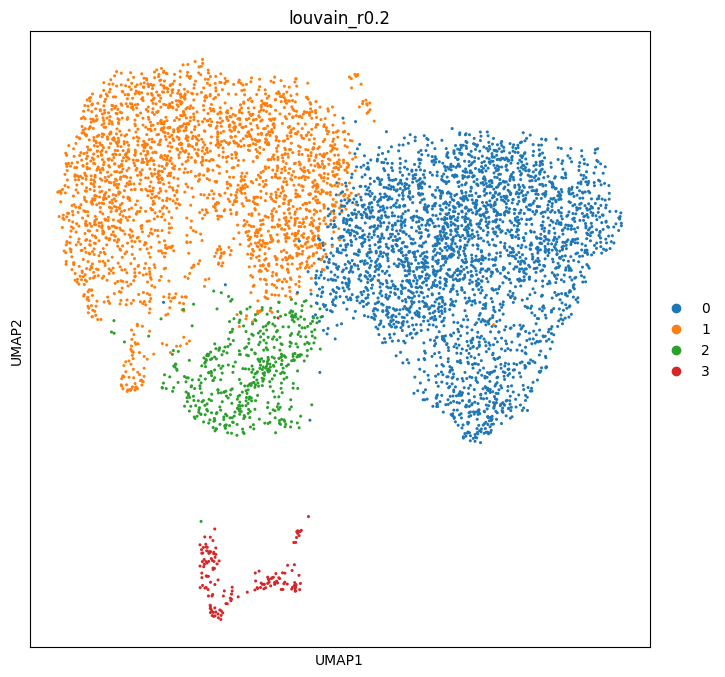

In [11]:
sc.tl.louvain(adata, resolution=0.2, key_added='louvain_r0.2', random_state=10)
adata.obs['louvain_r0.2'].value_counts()
sc.pl.umap(adata, color=['louvain_r0.2'])


#### Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['louvain_r0.2'])

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'])

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


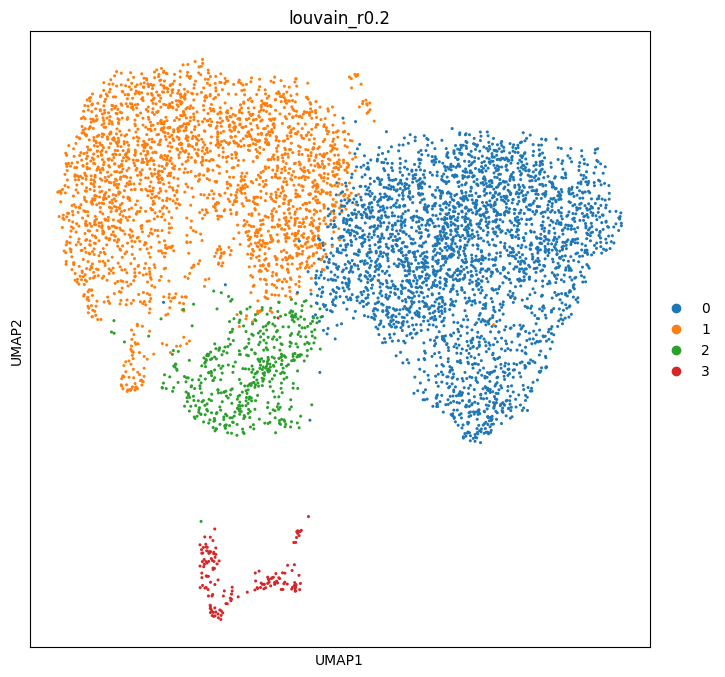

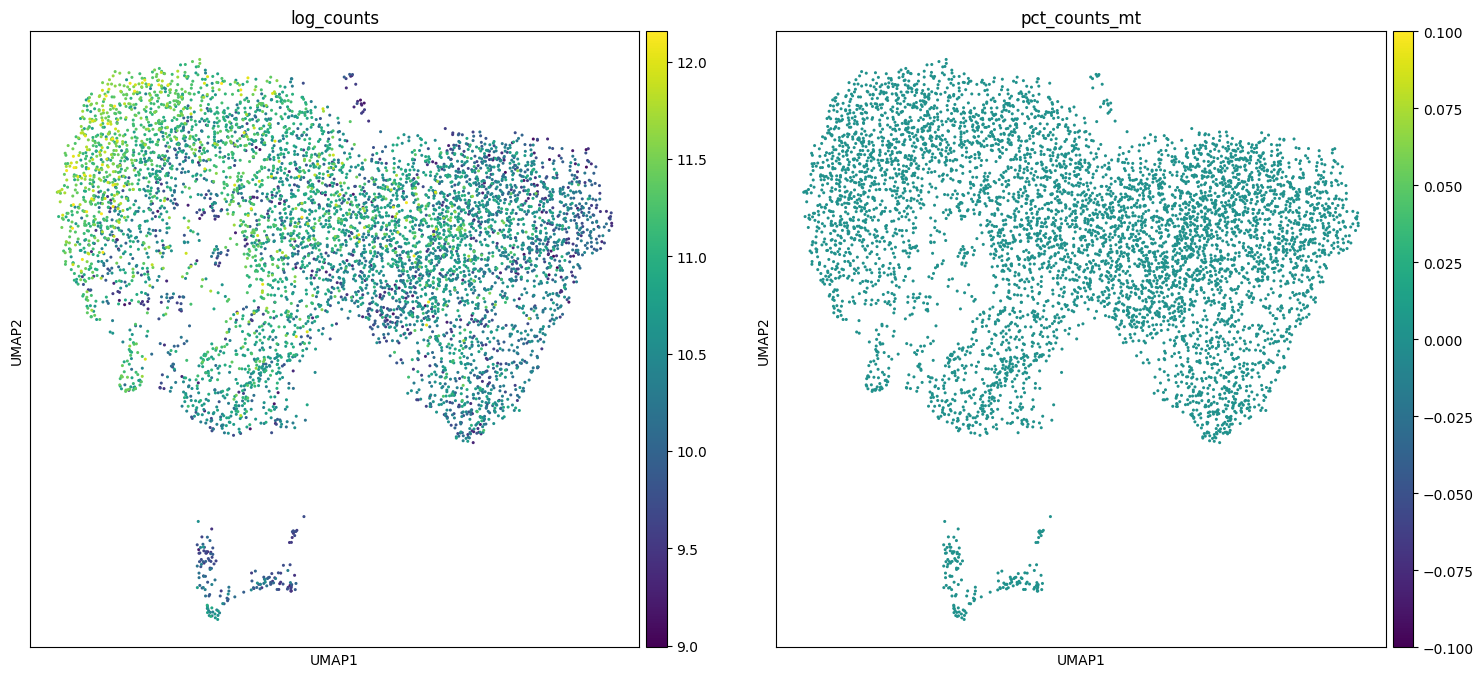

In [12]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['louvain_r0.2'], save='umap_6_firework.pdf')
# os.rename("figures/umap6_firework.pdf", 
#           "../rev_results/task1/6_firework/UMAP.pdf")

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'], save='umap_counts_6_firework.pdf')
# os.rename("figures/umap/6_firework/UMAP_counts.pdf", 
#           "../rev_results/task1/6_firework/UMAP_counts.pdf")

<a id="Markers"></a>

## Marker genes & cluster annotation

In [16]:
# Create a new AnnData object with gene symbols as var indices
adata_tmp = sc.AnnData(
    X=adata.X,  # Assuming you want to keep the same expression data
    obs=adata.obs.copy(),  # Copy the obs information from the original AnnData
)

# Set the gene symbols as var indices
adata_tmp.var.index = adata.var['gene_symbols-0-0-0-0-0-0']

In [17]:
# Perform gene ranking on the modified AnnData object
sc.tl.rank_genes_groups(adata_tmp, groupby='louvain_r0.2', key_added='rank_genes_r0.2')



ranking genes
    finished: added to `.uns['rank_genes_r0.2']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


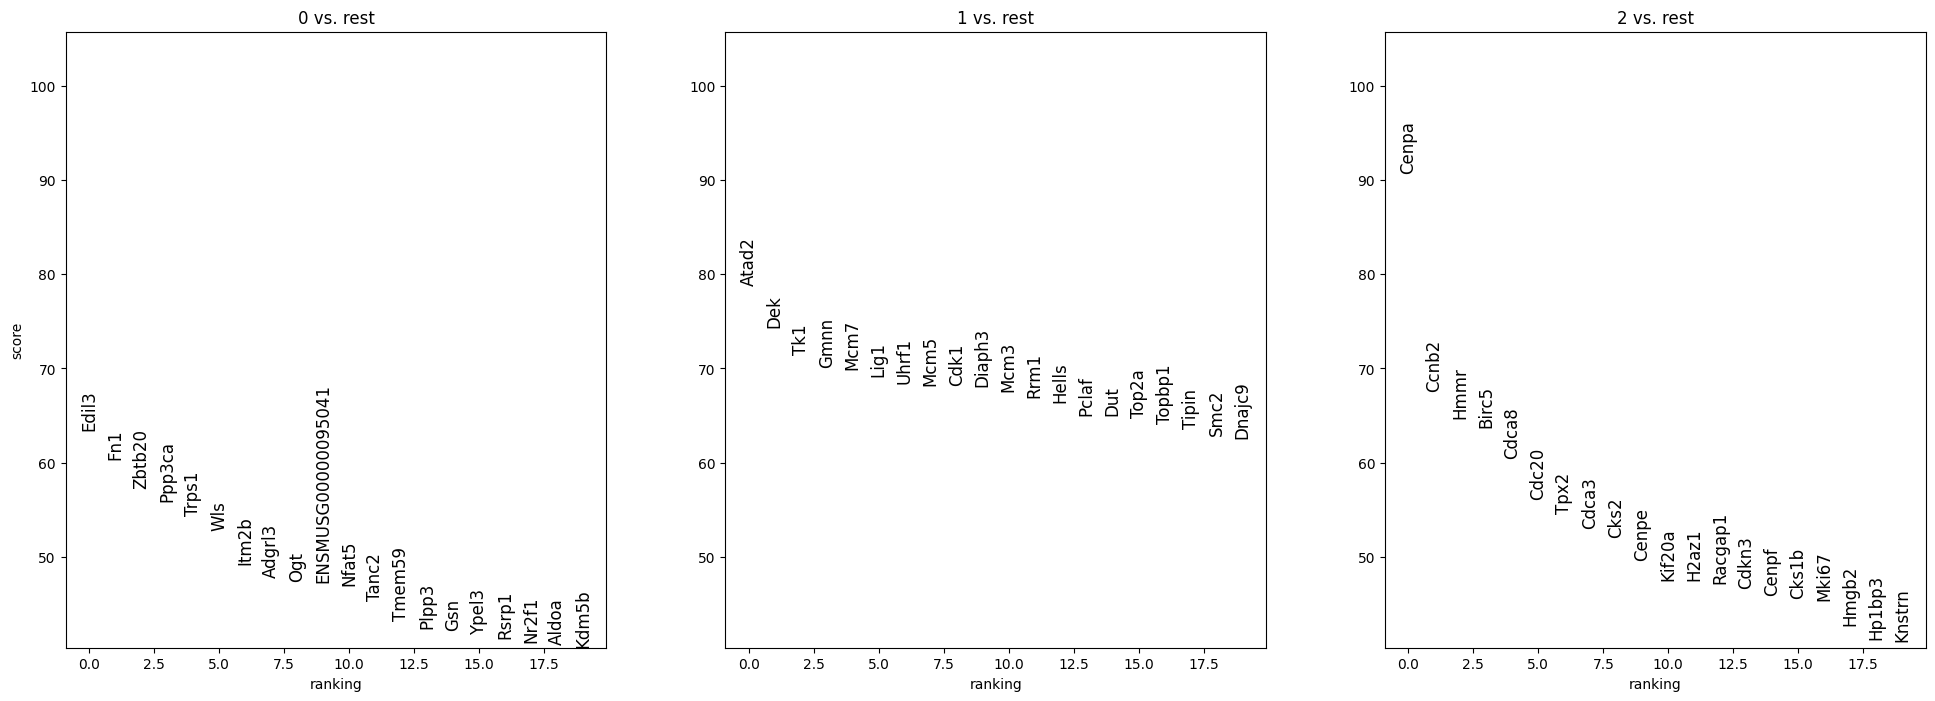

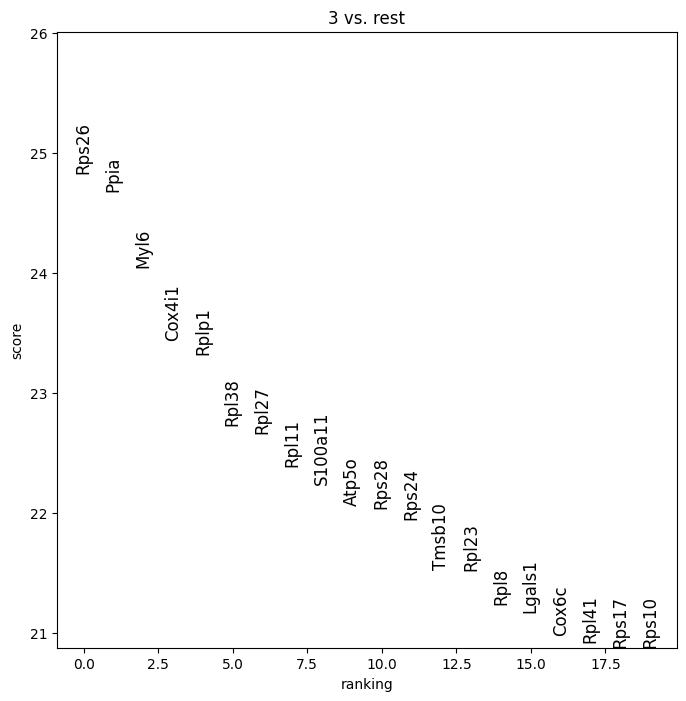

In [18]:
# Visualize the results using gene symbols
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_r0.2', groups=['0', '1', '2'], fontsize=12)
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_r0.2', groups=['3'], fontsize=12)

In [19]:
# Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

Below we plot genes of particular interest within the clusters

### Cluster 0

Encrypted symbol for  Edil3 is  ENSMUSG00000034488


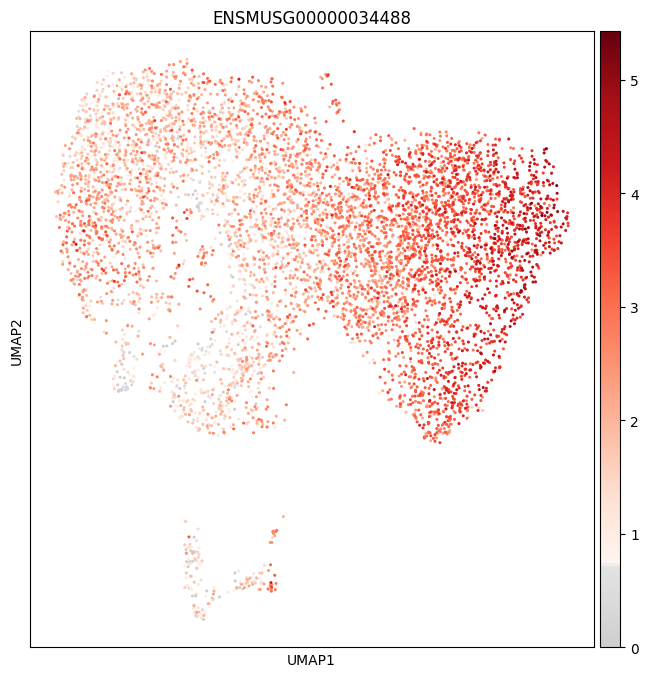

Encrypted symbol for  Fn1 is  ENSMUSG00000026193


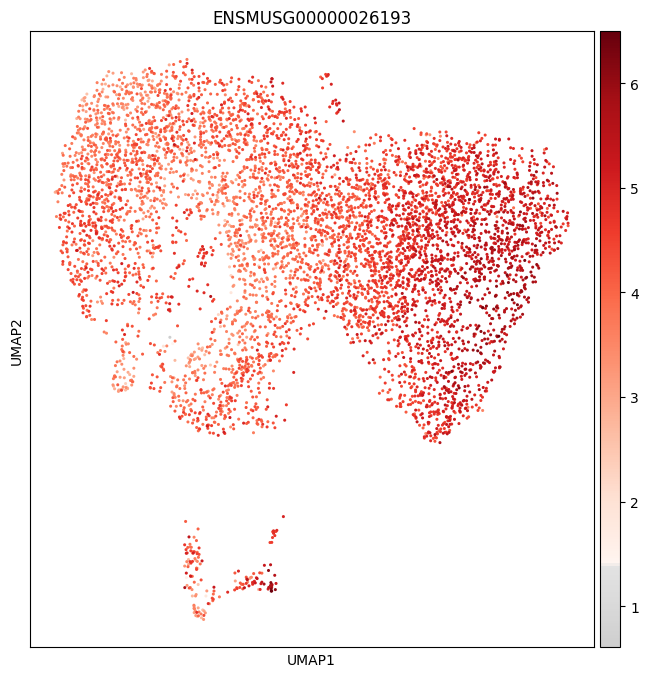

Encrypted symbol for  Zbtb20 is  ENSMUSG00000022708


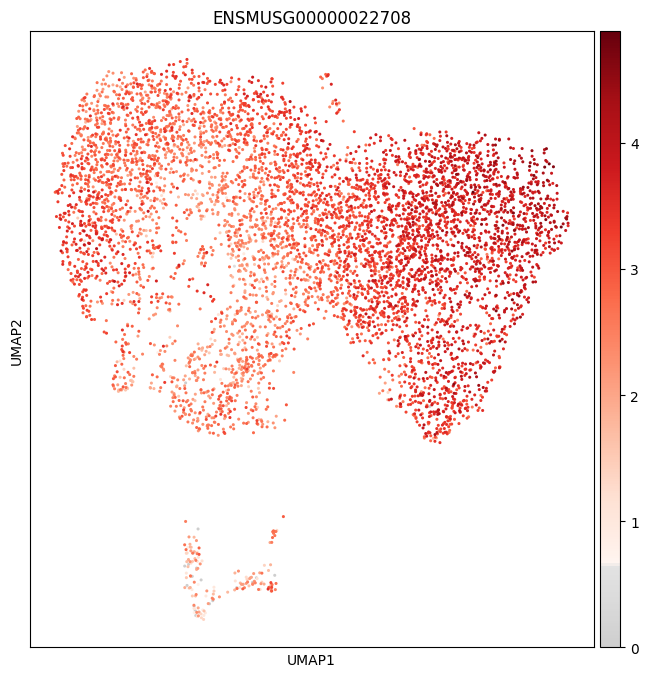

Encrypted symbol for  Ppp3ca is  ENSMUSG00000028161


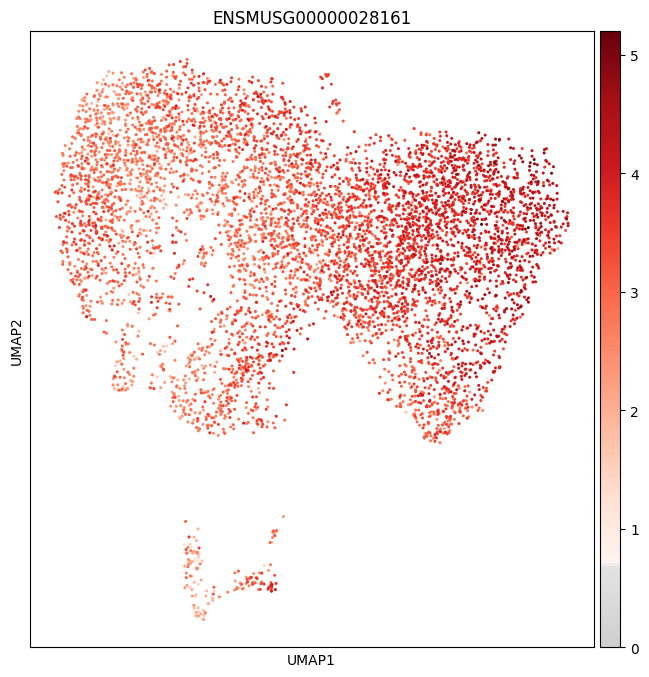

Encrypted symbol for  Trps1 is  ENSMUSG00000038679


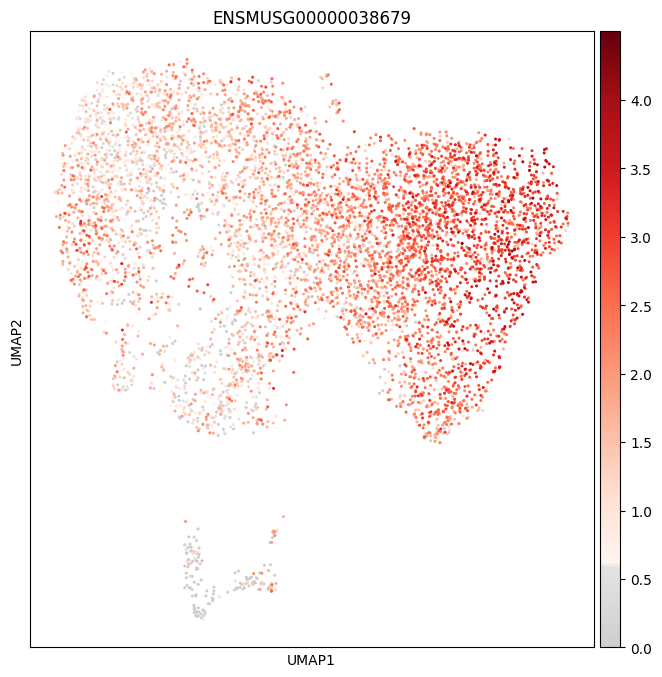

Encrypted symbol for  Wls is  ENSMUSG00000028173


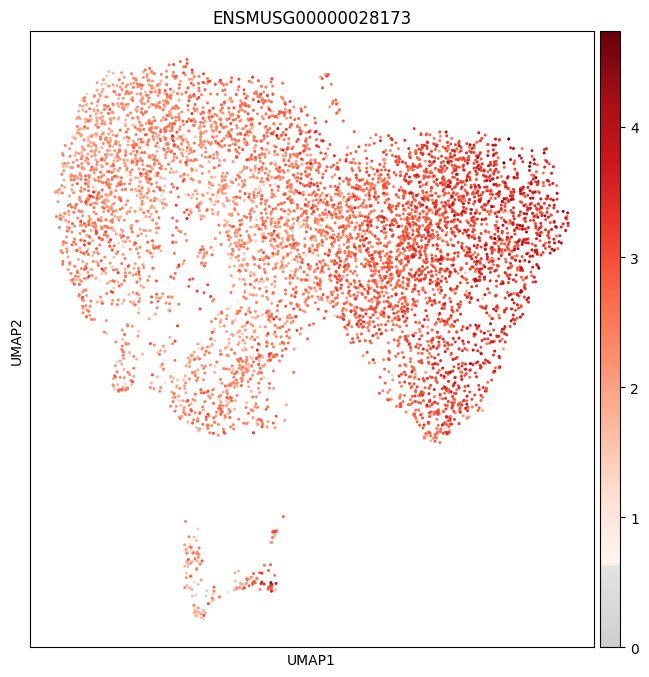

In [20]:
gene_symbols = ['Edil3', 'Fn1', 'Zbtb20', 'Ppp3ca', 'Trps1', 'Wls']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/6_firework_Cluster0_' + gene_symbol + '.pdf')


## Cluster 1

Encrypted symbol for  Atad2 is  ENSMUSG00000022360


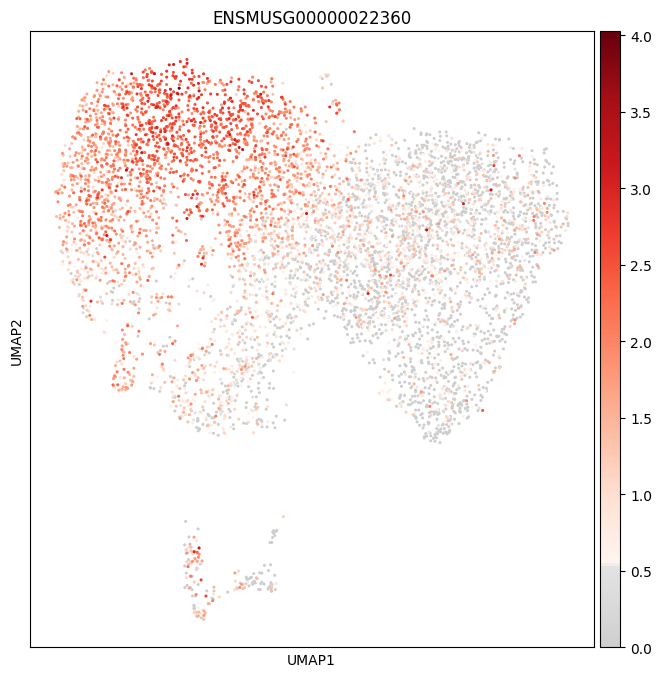

Encrypted symbol for  Dek is  ENSMUSG00000021377


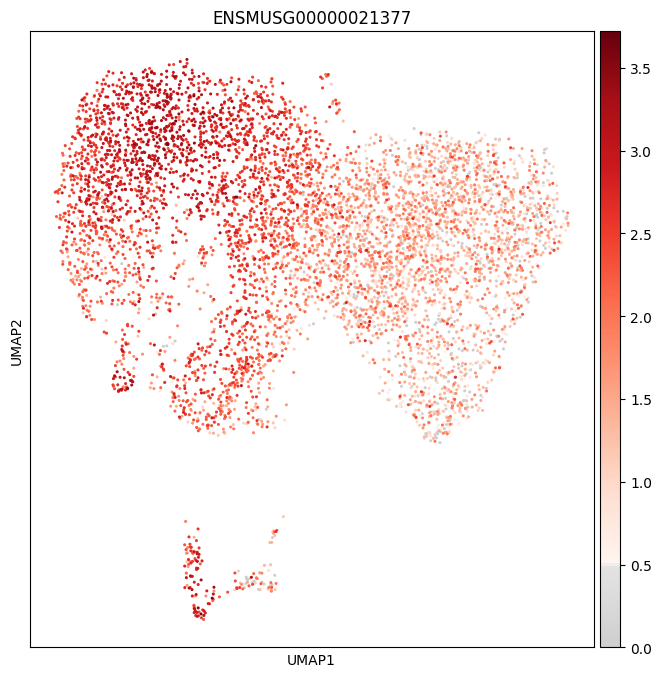

Encrypted symbol for  Tk1 is  ENSMUSG00000025574


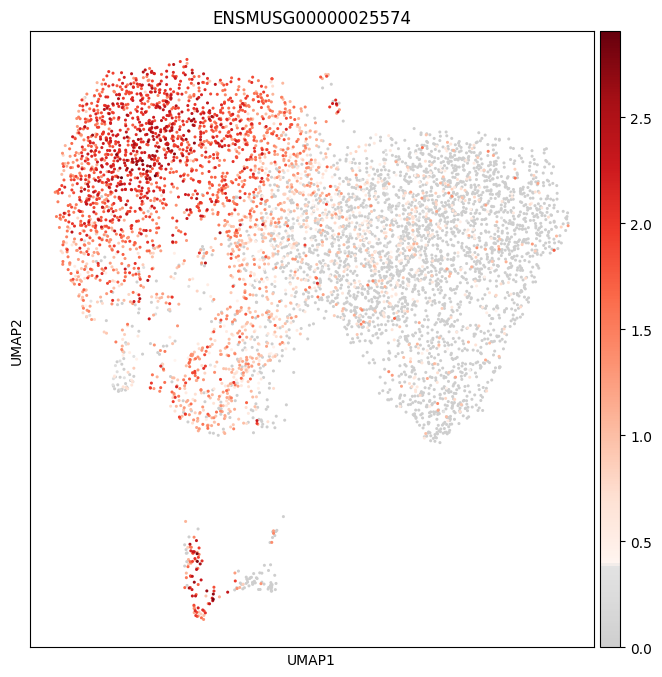

In [21]:
gene_symbols = ['Atad2', 'Dek', 'Tk1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/6_firework_Cluster1_' + gene_symbol + '.pdf')


## Cluster 2

Encrypted symbol for  Cenpa is  ENSMUSG00000029177


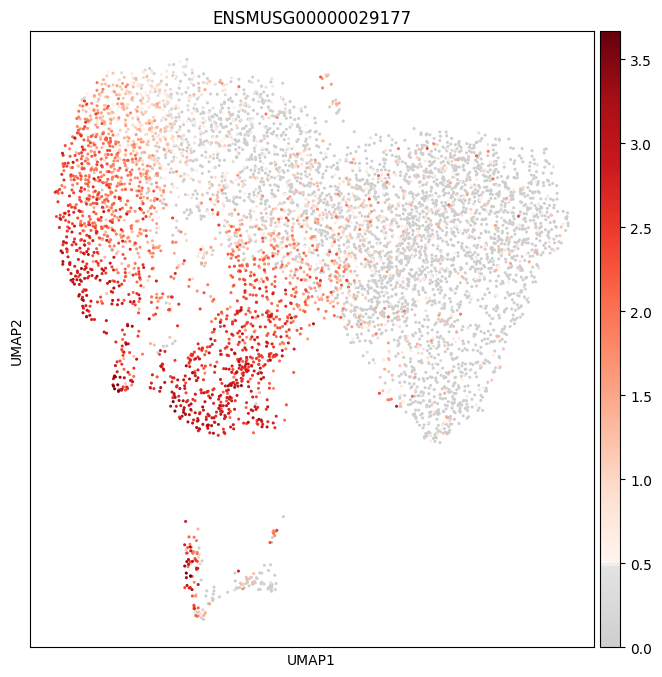

Encrypted symbol for  Ccnb2 is  ENSMUSG00000032218


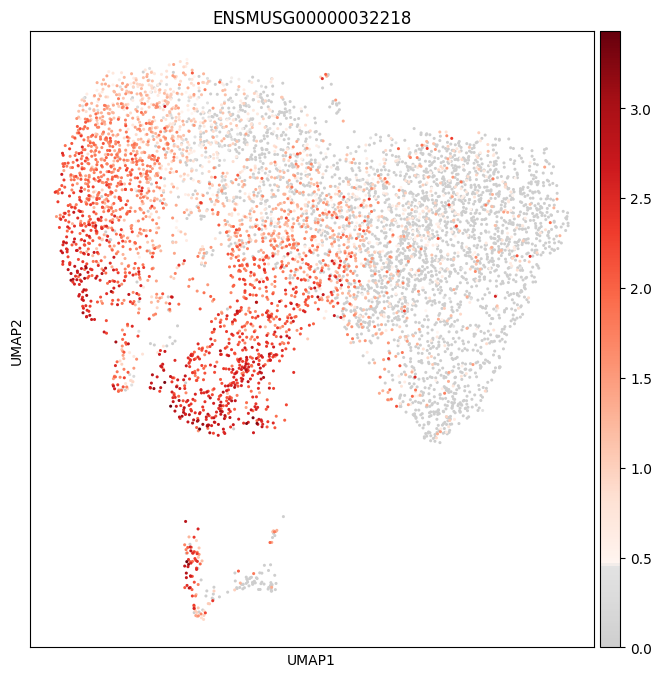

Encrypted symbol for  Hmmr is  ENSMUSG00000020330


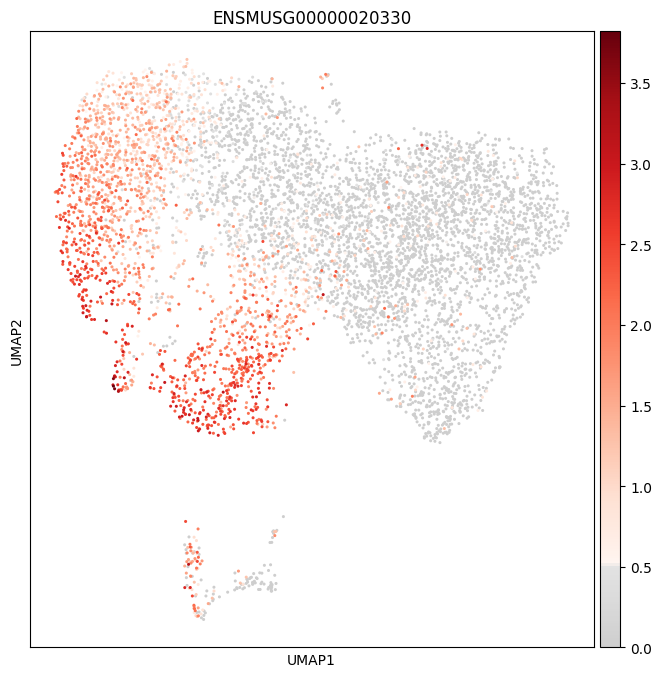

Encrypted symbol for  Birc5 is  ENSMUSG00000017716


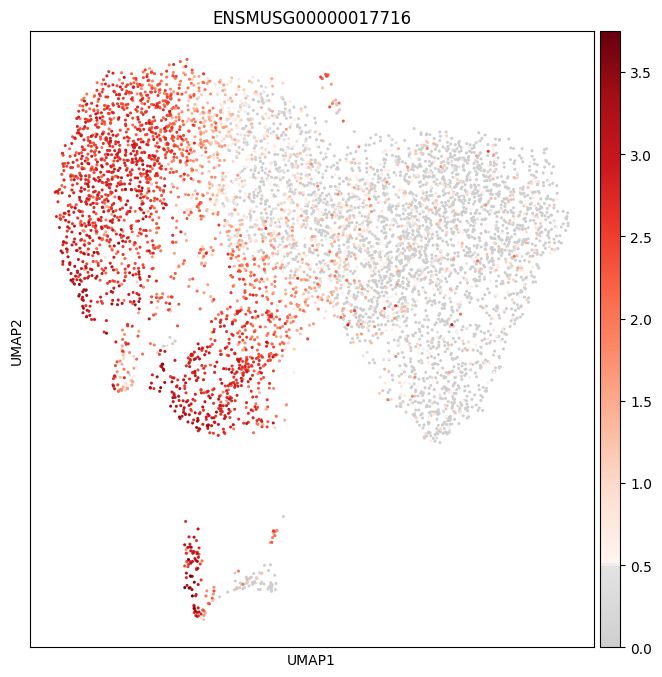

Encrypted symbol for  Cdca8 is  ENSMUSG00000028873


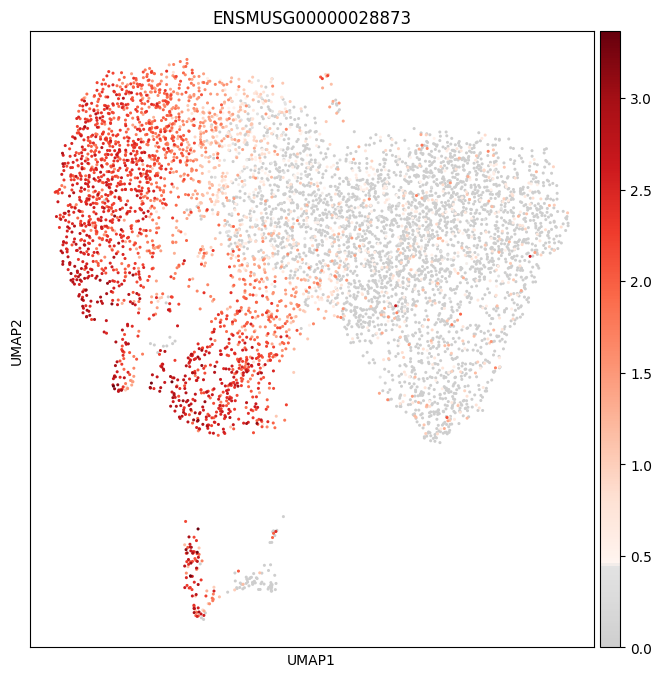

In [22]:
gene_symbols = ['Cenpa', 'Ccnb2', 'Hmmr', 'Birc5', 'Cdca8']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/6_firework_Cluster2_' + gene_symbol + '.pdf')


## Cluster 3

Encrypted symbol for  Rps26 is  ENSMUSG00000025362


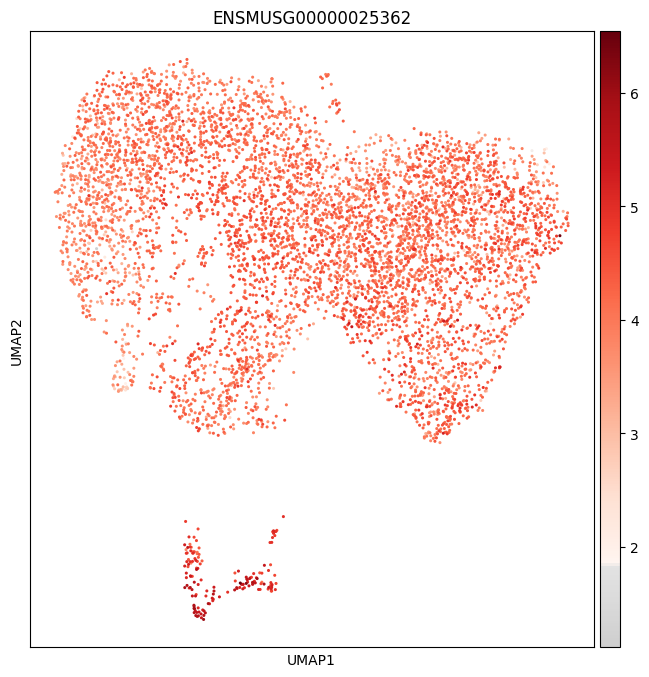

Encrypted symbol for  Ppia is  ENSMUSG00000071866


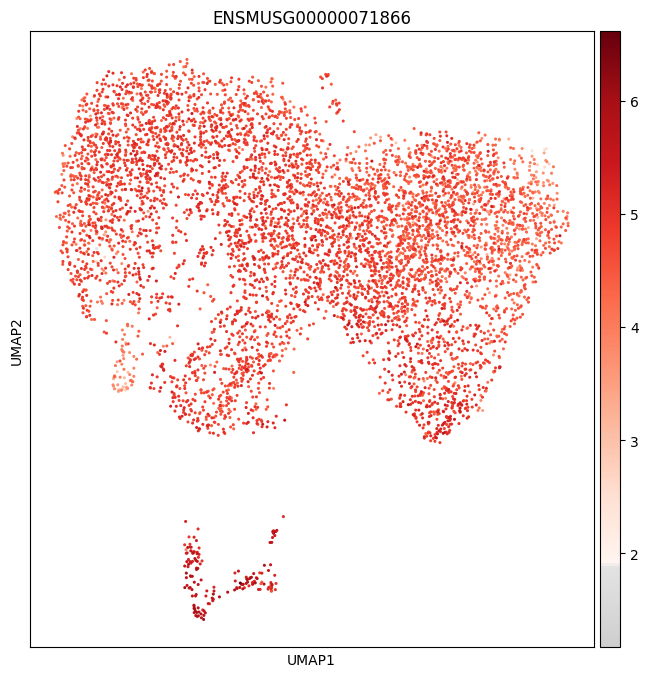

Encrypted symbol for  Myl6 is  ENSMUSG00000090841


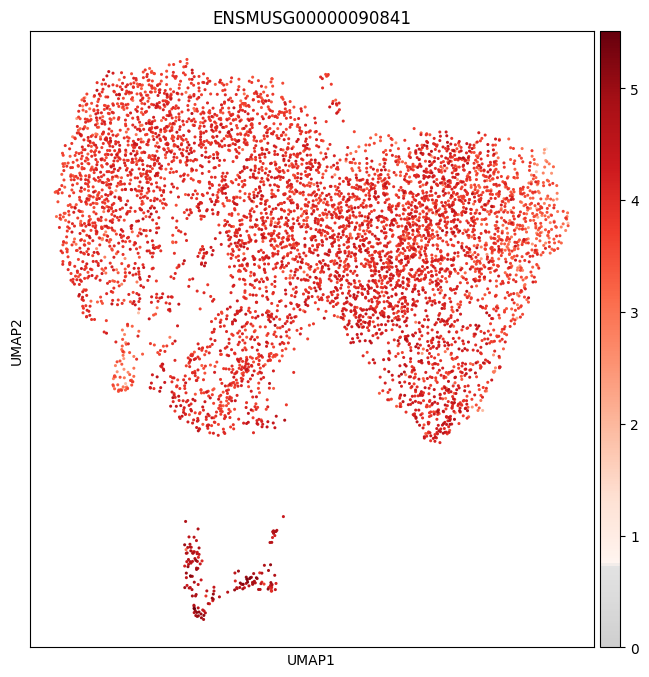

Encrypted symbol for  Cox4i1 is  ENSMUSG00000031818


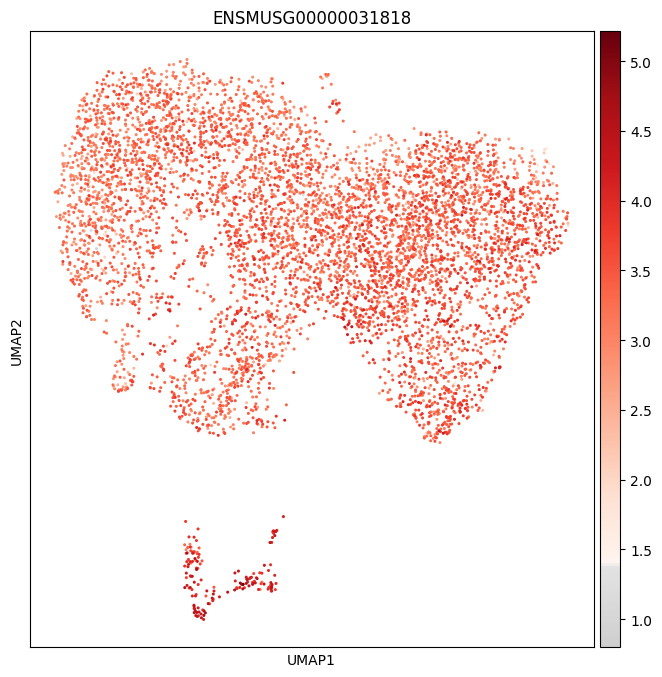

Encrypted symbol for  Rplp1 is  ENSMUSG00000007892


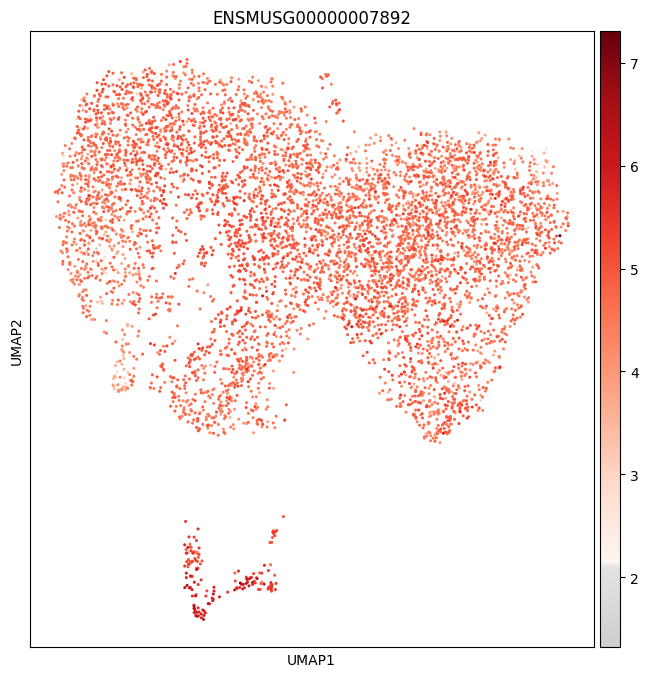

In [23]:
gene_symbols = ['Rps26', 'Ppia', 'Myl6', 'Cox4i1', 'Rplp1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/6_firework_Cluster3_' + gene_symbol + '.pdf')
